/home/vincent/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


x^2:  3491.6666666666665 xb =  55.0
Alu m, n= 1.1207142857142856   -25.305952380952377 m_err_Alu =  0.004404388958193105 n_err_Alu =  15.378658112357591
Kar m, n= 0.020000000000000004   -0.5666666666666669 m_err_Kar =  0.004404388958193105 n_err_Kar =  15.378658112357591
Edel m, n= 0.8064285714285714   -17.486904761904768 m_err_Edel =  0.004404388958193105 n_err_Edel =  15.378658112357591
15 abs 15
a_alu =  2.2640692640692638e-05
a_Kar =  4.040404040404041e-07
a_Edel =  1.629148629148629e-05
a_alu_d =  1.276132699554955e-08
a_Kar_d =  8.899252920585267e-09
a_Edel_d =  1.1067894488715944e-08


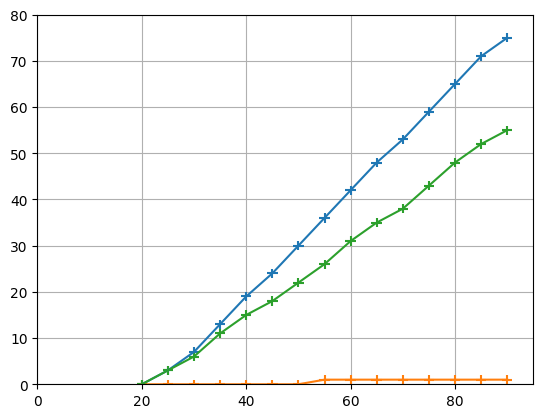

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

T = np.linspace(20, 90, 15)
Ts = np.linspace(20, 90, 1000)
dL_Alu = [0, 3, 7, 13, 19, 24, 30, 36, 42, 48, 53, 59, 65, 71, 75]
dL_Kar = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
dL_Edel = [0,3,6,11,15,18,22,26,31,35,38,43,48,52,55]

m_Alu,n_Alu = np.polyfit(T, dL_Alu, 1)
m_Kar,n_Kar = np.polyfit(T, dL_Kar, 1)
m_Edel,n_Edel = np.polyfit(T, dL_Edel, 1)

y_err = 1
x_err = 1

xsquare = np.sum(T**2) / len(T)
xmid = np.sum(T) / len(T)
print("x^2: ", xsquare, "xb = ", xmid)

m_err_Alu = ((y_err**2) / (len(dL_Alu)*(xsquare - xmid)))**0.5
m_err_Kar = (y_err**2 / (len(dL_Kar)*(xsquare - xmid)))**0.5
m_err_Edel = (y_err**2 / (len(dL_Edel)*(xsquare - xmid)))**0.5

n_err_Alu = xsquare * m_err_Alu
n_err_Kar = xsquare * m_err_Kar
n_err_Edel = xsquare * m_err_Edel

l_0 = 49.5 * 10e3
l_0_d = 0.2 * 10e3

print("Alu m, n=", m_Alu, " ", n_Alu, "m_err_Alu = ", m_err_Alu, "n_err_Alu = ", n_err_Alu)
print("Kar m, n=", m_Kar, " ", n_Kar, "m_err_Kar = ", m_err_Kar, "n_err_Kar = ", n_err_Kar)
print("Edel m, n=", m_Edel, " ", n_Edel, "m_err_Edel = ", m_err_Edel, "n_err_Edel = ", n_err_Edel)

print(len(dL_Alu), "abs", len(T))

def mult(x_1, x_2):
    out = np.empty(len(x_1))
    if (len(x_1) != len(x_2)):
        return
    for i in range(len(x_1)):
        out[i] = x_1[i] * x_2[i]
    return out

a_Alu = (m_Alu / l_0) * 10
a_Kar = (m_Kar / l_0) * 10
a_Edel = (m_Edel / l_0) * 10

print("a_alu = ", a_Alu)
print("a_Kar = ", a_Kar)
print("a_Edel = ", a_Edel)

a_Alu_d = ((m_err_Alu / l_0)**2 + (m_Alu * l_0_d / (l_0)**2)**2)**0.5
a_Kar_d = ((m_err_Kar / l_0)**2 + (m_Kar * l_0_d / (l_0)**2)**2)**0.5
a_Edel_d = ((m_err_Edel / l_0)**2 + (m_Edel * l_0_d / (l_0)**2)**2)**0.5

print("a_alu_d = ", a_Alu_d)
print("a_Kar_d = ", a_Kar_d)
print("a_Edel_d = ", a_Edel_d)

plt.errorbar(T, dL_Alu, yerr=y_err, xerr=x_err)
#plt.plot(Ts, m_Alu*Ts + n_Alu)
plt.errorbar(T, dL_Kar, yerr=y_err, xerr=x_err)
#plt.plot(Ts, m_Kar*Ts + n_Kar)
plt.errorbar(T, dL_Edel, yerr=y_err, xerr=x_err)
#plt.plot(Ts, m_Edel*Ts + n_Edel)
plt.xlim(0, 95)
plt.ylim(0, 80)
plt.grid()
plt.show()